## Q1. Modify the position of dog of image by manupulating its image without using any predefine libreary

### Q2 Write manually code to apply average code (3*3) gaussian filter image should be blur

Q3 Appy following filter on image 
  1. to blur image (gaussian filter and simple blur filter)
  2. apply filter for edge detection

Q4 Take two images first image of dog and second image of hourse and
generate two new images having dog cointains hourse head and vise varsa (dont use any predefine libraries)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img_bgr = cv2.imread('lufffy.jpg')

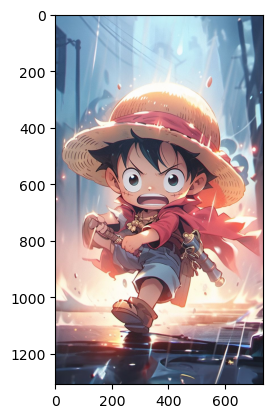

In [5]:
img = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
img.shape

(1308, 736, 3)

In [9]:
img[:,:,:]

array([[[ 96, 142, 178],
        [ 96, 142, 178],
        [ 95, 141, 177],
        ...,
        [ 47,  66,  98],
        [ 47,  66,  98],
        [ 48,  67,  99]],

       [[ 95, 141, 177],
        [ 94, 140, 176],
        [ 94, 140, 176],
        ...,
        [ 47,  66,  98],
        [ 47,  66,  98],
        [ 48,  67,  99]],

       [[ 94, 140, 176],
        [ 94, 140, 176],
        [ 93, 139, 175],
        ...,
        [ 47,  66,  98],
        [ 47,  66,  98],
        [ 48,  67,  99]],

       ...,

       [[ 34,  40,  54],
        [ 34,  40,  54],
        [ 34,  40,  54],
        ...,
        [ 24,  30,  42],
        [ 24,  30,  42],
        [ 24,  30,  42]],

       [[ 34,  40,  54],
        [ 34,  40,  54],
        [ 34,  40,  54],
        ...,
        [ 24,  30,  42],
        [ 24,  30,  42],
        [ 24,  30,  42]],

       [[ 34,  40,  54],
        [ 34,  40,  54],
        [ 34,  40,  54],
        ...,
        [ 24,  30,  42],
        [ 24,  30,  42],
        [ 24,  30,  42]]

# Q1

In [11]:
resized = cv2.resize(img,(400,400))

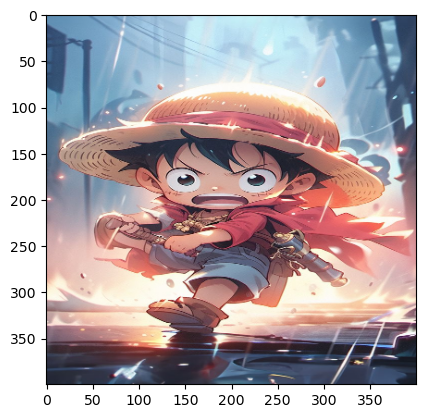

In [13]:
plt.imshow(resized)

In [15]:
resized.shape

(400, 400, 3)

In [29]:
resized[:,:,1]

array([[140, 140, 140, ...,  65,  66,  66],
       [142, 141, 141, ...,  65,  66,  66],
       [141, 140, 140, ...,  64,  66,  67],
       ...,
       [ 40,  40,  40, ...,  31,  31,  31],
       [ 40,  40,  40, ...,  31,  31,  31],
       [ 40,  40,  39, ...,  30,  30,  30]], dtype=uint8)

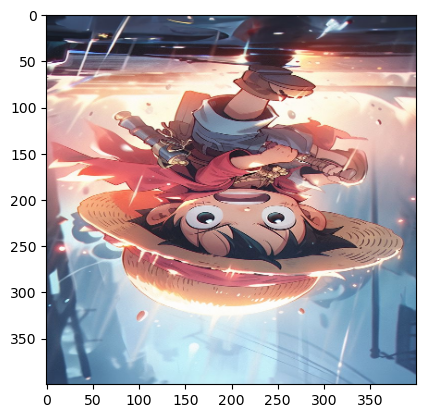

In [33]:
h,w,c = resized.shape

r_img = np.zeros((w, h, c), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        r_img[h-i-1,w-j-1] = resized[i,j]

plt.imshow(r_img)

### Q2 Apply gaussian filter manually

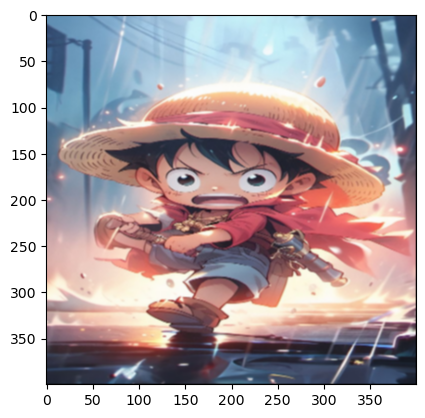

In [61]:
filter = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
] , dtype=np.float32)

h,w,c = resized.shape

filter /= np.sum(filter)

padded_img = np.zeros((h + 2, w + 2, c), dtype=np.uint8)
padded_img[1:h+1, 1:w+1] = resized

blur_img = np.zeros_like(resized, dtype=np.uint8)

for i in range(1,h+1):
    for j in range(1,w+1):
        for k in range(c):

            area = padded_img[i-1:i+2, j-1:j+2, k]
            blur = np.sum(area * filter)

            blur_img[i-1,j-1,k] = min(255,max(0,int(blur)))

plt.imshow(blur_img)

### Q3 Appy following filter on image 
#####  1. to blur image (gaussian filter and simple blur filter)
#####  2. apply filter for edge detection

1. USING Gaussian filter

In [96]:
gaussian_blur = cv2.GaussianBlur(img, (15, 15), 0)
simple_blur = cv2.blur(img, (15, 15))

(-0.5, 399.5, 399.5, -0.5)

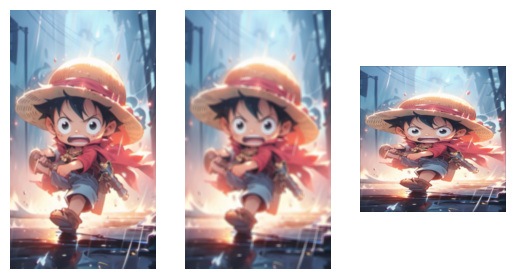

In [98]:
plt.subplot(1,3,1)
plt.imshow(gaussian_blur)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(simple_blur)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blur_img)
plt.axis('off')

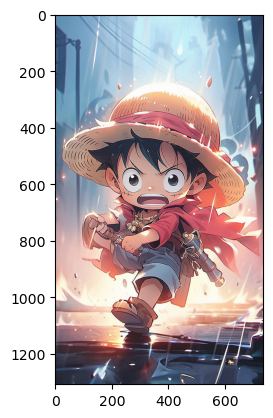

In [103]:
Sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

sharp_img = cv2.filter2D(img, -1, Sharpen)

plt.imshow(sharp_img)

2. Edge detection

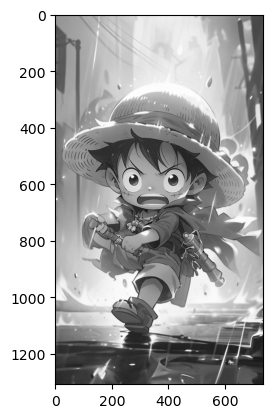

In [92]:
gray = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')